# Advanced Clustering

This chapter is an add-on to [📓 **Clustering Basics**](../ml/ml-clustering.iypnb) and introduces additional clustering methods and concepts.

## Preamble

In [1]:
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt

In [2]:
import data_science_learning_paths
data_science_learning_paths.setup_plot_style(dark=True)

## Example Dataset: House Prices

In [3]:
houses_data = data_science_learning_paths.datasets.read_house_prices(
    encode_categorial=True,
    encode_ordinal=True
)

In [4]:
houses_data.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,...,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,SalePrice
0,856,854,3,3,706,0,1,0,2,150,...,0,1,0,0,0,0,0,0,1,208500
1,1262,0,3,3,978,0,0,1,2,284,...,0,1,0,0,0,0,0,0,1,181500
2,920,866,3,3,486,0,1,0,2,434,...,0,1,0,0,0,0,0,0,1,223500
3,961,756,3,2,216,0,1,0,3,540,...,0,1,0,0,0,0,0,0,1,140000
4,1145,1053,4,3,655,0,1,0,2,490,...,0,1,0,0,0,0,0,0,1,250000


In [5]:
houses_data.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'FireplaceQu', 'Fireplaces',
       'FullBath', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageQual',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LotArea', 'LowQualFinSF', 'MiscVal', 'OverallCond', 'OverallQual',
       'PoolArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd',
       'YrSold', 'MSSubClass', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'F

In [6]:
houses_features = houses_data[["YearBuilt", "TotalBsmtSF", "GrLivArea", "GarageArea", "LotArea", "SalePrice"]]

In [7]:
houses_features.head()

,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,LotArea,SalePrice
0,2003,856,1710,548,8450,208500
1,1976,1262,1262,460,9600,181500
2,2001,920,1786,608,11250,223500
3,1915,756,1717,642,9550,140000
4,2000,1145,2198,836,14260,250000


## Clustering without A-priori Number of Clusters

Many well-known clustering algorithms, such as _$k$-Means_, expect as input the number of clusters to be found. This can be problematic in practice: Since we do not know the structure of our data, how can we know the "actual" number of clusters? How can we estimate a meaningful number?

While there are ways to tackle this problem (for example, using domain knowledge), the alternative is to rely on clustering algorithms that have the number of clusters as an output.

### Example: MeanShift Algorithm

In [8]:
from sklearn.cluster import MeanShift

In [9]:
houses_clustered = houses_features

In [10]:
houses_clustered["clusters MeanShift"] = MeanShift().fit_predict(houses_features)

/var/folders/pl/9s2ysv_92pn6_2w7j2t40mh00000gn/T/ipykernel_57952/3913871430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_clustered["clusters MeanShift"] = MeanShift().fit_predict(houses_features)


<AxesSubplot:>

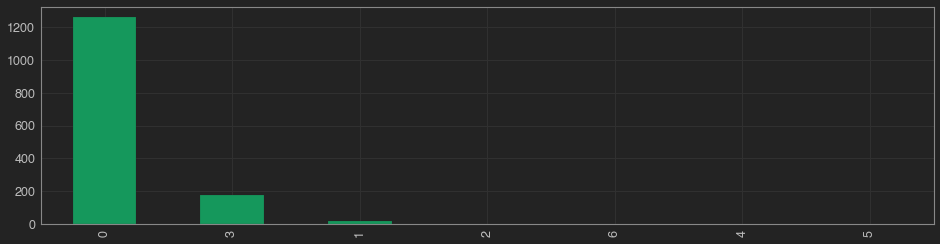

In [11]:
houses_clustered["clusters MeanShift"].value_counts().plot(kind="bar")

/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 var

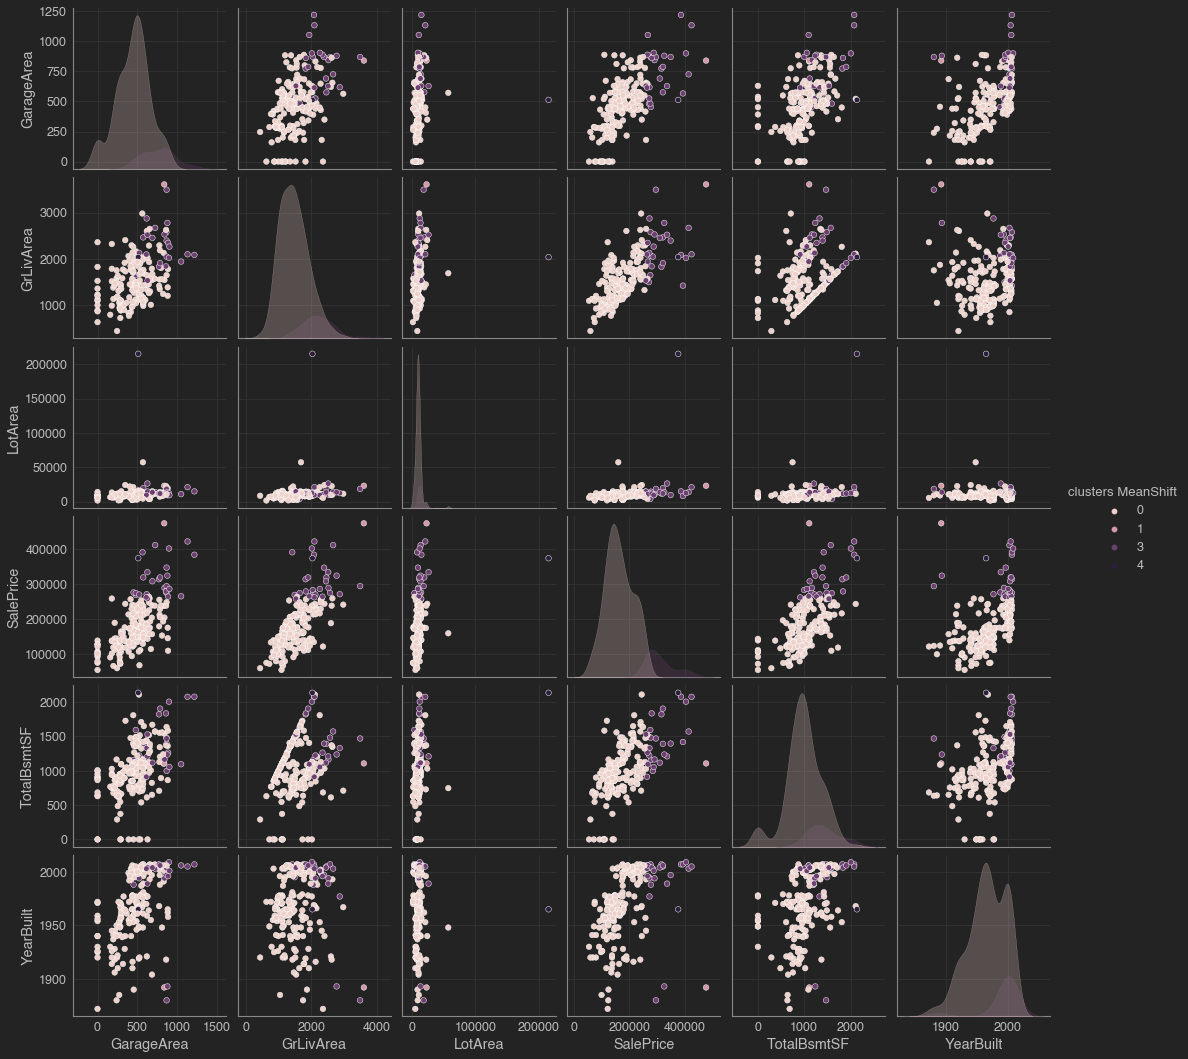

In [14]:
seaborn.pairplot(
    data=houses_clustered.sample(n=200),
    vars=houses_clustered.columns.difference(["clusters MeanShift"]),
    hue="clusters MeanShift",
)

### Hierarchical Clustering 

So far we have only considered clustering techniques that output a **partition** of the dataset - a set of disjoint subsets. **Hierarchical clustering** on the other hand outputs a **hierarchy** of subsets.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/420px-Iris_dendrogram.png)

_A hierarchical clustering can be visualized as a **dendrogram** - a tree of clusters._ [Source](https://commons.wikimedia.org/wiki/File:Iris_dendrogram.png#mw-jump-to-license)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

def clustering_dendrogram(data, sample_size, truncate=None, scale=False):
    """Draw a dendrogram based on hierarchical clustering"""
    data = data.sample(sample_size)
    if scale:
        data_pre = preprocessing.StandardScaler().fit_transform()
    else:
        data_pre = data
    links = linkage(data_pre, method="ward")
    c, coph_dists = cophenet(links, pdist(data_pre))
    plt.figure(figsize=(18,6))
    plt.title("Hierarchical Clustering Dendrogram (cophenetic correlation {0:.2f})".format(c))
    plt.xlabel('sample index')
    plt.ylabel('distance')
    args = dict() 
    if truncate:
        args = {"truncate_mode": "lastp", "p": truncate, "show_contracted": True}
    den = dendrogram(
        links,
        **args
    )

In [ ]:
clustering_dendrogram(houses_features, sample_size=100)

### Density-based Clustering

**DBSCAN** is a so-called **density-based clustering** algorithm. 

- two data points with a distance of less than $\epsilon$ are considered close
- a data point with at least $k$ points close to it are considered **core points**
- a point is **directly reachable** from a core point if its distance to the core point is less than $\epsilon$
- a point $p$ is reachable from another point $q$ if there is a path of points direactly reachable from each other connecting $p$ and $q$
- a **cluster** contains at least one core point and all the points reachable from it
- all points not reachable from another point are considered **outliers** 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/320px-DBSCAN-Illustration.svg.png)

_DBSCAN example: $A$ is a core point in the red cluster. $B$ and $C$ are also part of the cluster, but are not core points. $N$ is an outlier_

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
DBSCAN?

Let's try it out. In order to have a better chance at guessing a suitable parameter $\epsilon$, we first scale all features to the interval $[0,1]$.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
houses_features_scaled = MinMaxScaler().fit_transform(houses_features)

In [ ]:
houses_clustered["clusters DBSCAN"] = DBSCAN(
    eps=0.1,
    min_samples=5,
).fit_predict(houses_features_scaled)

In [ ]:
houses_clustered["clusters DBSCAN"].value_counts().plot(kind="bar")

In [ ]:
seaborn.pairplot(
    data=houses_clustered.sample(n=200),
    vars=houses_clustered.columns.difference(["clusters MeanShift", "clusters DBSCAN"]),
    hue="clusters DBSCAN",
)

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2026 [Point 8 GmbH](https://point-8.de)_

